Question 3. By extending the wave-prop.py, make a code to simulate twodimensional propagation of a wave (use the result of Q2). Create an interference 
pattern of two circular waves originating from two different points in the middle of 
the simulation domain. You can do that by putting driving terms (e.g. u 𝑖,𝑗 =
𝐴 sin 𝜔𝑡) at the origins of the waves.


In [92]:
import numpy as np
import matplotlib.pyplot as plt

In [93]:
# Input
xmax=float(input("xmax="))
ymax=float(input("ymax="))
dx=float(input("dx="))
dy=float(input("dy="))
dt=float(input("dt="))
f=float(input("f="))
smax=int(input("smax="))        # max. num. steps of iteration
dsav=int(input("showEvery="))   # show figures every this step 

xmax=2
ymax=2
dx=0.01
dy=0.01
dt=0.005
f=5
smax=100
showEvery=100


In [94]:
# Simulation parameters
alx=dt/dx   # alpha parameter
aly=dt/dy
ax=alx**2  
ay=aly**2
b=2*(1-ax-ay)

w=2.0*np.pi*f

In [95]:
# Mesh
x=np.arange(0,xmax+dx,dx)
y=np.arange(0,ymax+dy,dy)
X,Y=np.meshgrid(x,y)

In [96]:
cntry=int(0.5*ymax/dx)
cntrx=int(0.5*xmax/dy)

In [102]:
u1= 0*X
ubuf1= 0*X
uo1= 0*X

In [103]:
u2= 0*X
ubuf2= 0*X
uo2= 0*X

In [110]:
s = 2
while s <= smax*4 :
    u1[cntrx,0] = np.sin(w*s*dt)
    ubuf1[1:-1,1:-1] = u1[1:-1,1:-1]
    u1[1:-1,1:-1] = b*u1[1:-1,1:-1] +ax*(u1[2:,1:-1]+u1[0:-2,1:-1])+ax*(u1[1:-1,2:] + u1[1:-1,0:-2]) - uo1[1:-1,1:-1]
    uo1[1:-1,1:-1] = ubuf1[1:-1,1:-1]
    s+=1


In [111]:
t = 2
while t <= smax*4 :
    u2[cntrx,-1] = np.sin(w*t*dt)
    ubuf2[1:-1,1:-1] = u2[1:-1,1:-1]
    u2[1:-1,1:-1] = b*u2[1:-1,1:-1] +ax*(u2[2:,1:-1]+u2[0:-2,1:-1])+ax*(u2[1:-1,2:] + u2[1:-1,0:-2]) - uo2[1:-1,1:-1]
    uo2[1:-1,1:-1] = ubuf2[1:-1,1:-1]
    t+=1

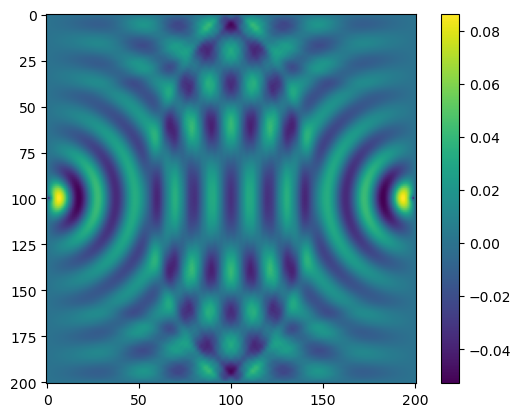

In [112]:
cs=plt.imshow(u1+u2); plt.colorbar(cs); plt.show()